In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report


Read the csv file `heart_failure_clinical_records_dataset.csv` into a DataFrame, print the shape, and show the head.

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(df.shape)
df.head()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


This is a dataset of 299 patients with heart failure collected in 2015.

Source: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Attribute Information:

- **age**: age of the patient (years)
- **anaemia**: decrease of red blood cells or hemoglobin (boolean)
- **high blood pressure**: if the patient has hypertension (boolean)
- **creatinine phosphokinase** (CPK): level of the CPK enzyme in the blood (mcg/L)
- **diabetes**: if the patient has diabetes (boolean)
- **ejection fraction**: percentage of blood leaving the heart at each contraction (percentage)
- **platelets**: platelets in the blood (kiloplatelets/mL)
- **sex**: woman or man (binary)
- **serum creatinine**: level of serum creatinine in the blood (mg/dL)
- **serum sodium**: level of serum sodium in the blood (mEq/L)
- **smoking**: if the patient smokes or not (boolean)
- **time**: follow-up period (days)
- [target] **death event**: if the patient deceased during the follow-up period (boolean)



# Exploratory data analysis

### Task 1

Find the counts of `DEATH_EVENT` values. This tells us how many patients survived (`DEATH_EVENT`=0) and how many are deceased (`DEATH_EVENT`=1).

In [3]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

### Task 2

Find the correlation of `DEATH_EVENT` with each of the following attributes:
`age`, `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, `serum_creatinine`, and `serum_sodium`. 

What are the two attributes that have the strongest correlation (positive or negative) with `DEATH_EVENT`?

In [4]:
attributes=["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]

In [5]:
for c in attributes:
    corr= np.corrcoef(df[c], df["DEATH_EVENT"])[0][1]
    print(c +": " , corr)

age:  0.2537285430880035
creatinine_phosphokinase:  0.06272816025237475
ejection_fraction:  -0.26860331239406177
platelets:  -0.04913886798037429
serum_creatinine:  0.29427756098414926
serum_sodium:  -0.195203596416401


# Age and the serum_creatinine has the strongest correlation

### Task 3

Create two subsets, one for survived patients (call it `df1`), and the other for deceased patients (call it `df2`), then print the shape of each.

In [6]:
df1=df[df["DEATH_EVENT"]==0][["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]]
df1.shape

(203, 6)

In [7]:
df2=df[df["DEATH_EVENT"]==1][["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]]
df1.shape

(203, 6)

The following code will show a visualization that compares the two categories in terms of the six attributes: 

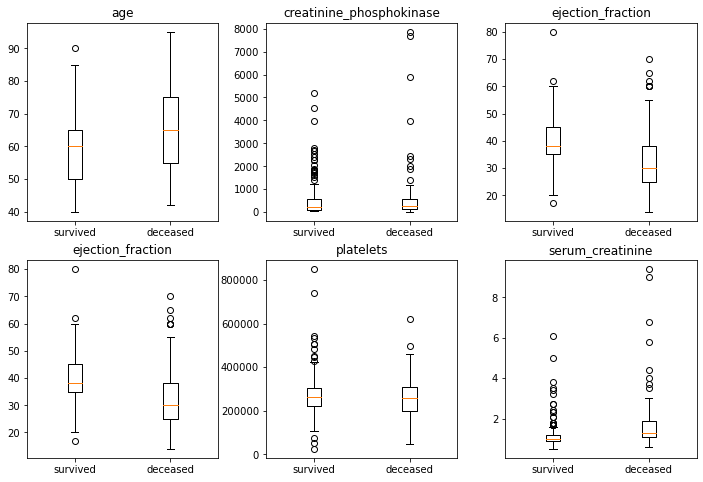

In [8]:
fig, axs = plt.subplots(2,3, figsize=(12,8))
for i in range(2):
    for j in range(3):
        k = 2*i+j
        attr = attributes[k]
        ax = axs[i,j]
        ax.boxplot([df1[attr], df2[attr]]);
        ax.set_title(attr)
        ax.set_xticklabels(['survived', 'deceased'])
plt.subplots_adjust(wspace=.25)        

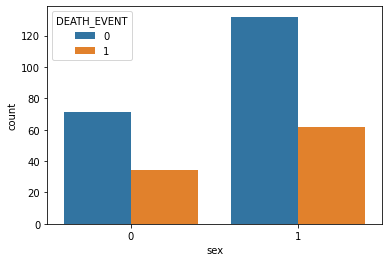

In [22]:
sns.countplot(x="sex", hue="DEATH_EVENT", data=df);

# Statistical Analysis

### Task 4

Perform a t-test to examine a hypothesis that says: the average age of deceased patients is greater than 60 years, with a 99% confidence level.

* $H_0 : \mu \leq 60$
* $H_a : \mu > 60$

First select the suitable sample, and set the significance level.
Then, choose which function and parameters should you use for the t-test.
Finally, compare the p-value to the significance level and make the decision, and interpret it.

In [9]:
X= df[df["DEATH_EVENT"]==1]["age"]
print(len(X), X.mean())

alpha=0.01

tsat, pval= stats.ttest_1samp(a=X, popmean=60, alternative="greater")
print("P-value: ", pval)
print("t-statistic: ", tsat)

if pval <alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")


96 65.21528125
P-value:  0.00010088512548265157
t-statistic:  3.8668808171917215
we reject the null hypothesis


### Task 5

Perform a t-test to examine the hypothesis that says: the average platelets is different for survived patients from deceased patients.

In [10]:
A=df[df["DEATH_EVENT"]==0]["platelets"]
B=df[df["DEATH_EVENT"]==1]["platelets"]
print(len(A), A.mean())
print(len(B), B.mean())

alpha=0.01

tsat, pval= stats.ttest_ind(a=A, b=B, alternative="two-sided")
print("P-value: ", pval)
print("t-statistic: ", tsat)

if pval<alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")

203 266657.4899014779
96 256381.0447916667
P-value:  0.3971941540413678
t-statistic:  0.8478681784251544
we fail to reject the null hypothesis


### Task  6

Perform a t-test to examine the hypothesis that: the average ejection fraction is higher for survived patients than for deceased patients. 

In [11]:
C= df[df["DEATH_EVENT"]==1]["ejection_fraction"]
D= df[df["DEATH_EVENT"]==0]["ejection_fraction"]

print(len(C), C.mean())
print(len(D), D.mean())

alpha=0.01

tsat, pval= stats.ttest_ind(a=C, b=D, alternative="greater")
print("t-statistic: ", tsat)
print("P-value: ", pval)

if pval<alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")

96 33.46875
203 40.26600985221675
t-statistic:  -4.80562826839639
P-value:  0.999998773551291
we fail to reject the null hypothesis


### Task 7

Perform a t-test to examine the hypothesis that the average serum creatinine is lower for survived patients than for deceased patients. 

In [12]:
E= df[df["DEATH_EVENT"]==1]["serum_creatinine"]
F= df[df["DEATH_EVENT"]==0]["serum_creatinine"]

print(len(E), E.mean())
print(len(F), F.mean())

alpha=0.01

tsat, pval= stats.ttest_ind(a=E, b=F, alternative="greater")
print("t-statistic: ", tsat)
print("P-value: ", pval)

if pval<alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")

96 1.8358333333333332
203 1.184876847290641
t-statistic:  5.306457599754319
P-value:  1.0950989274489843e-07
we reject the null hypothesis


### Task 8

Find the contingency table of `smoking` and `DEATH_EVENT`.

Then, perform a chi-squared test to examine whether `DEATH_EVENT` is dependent or independent from `smoking`. Use a 95% confidence level.

In [13]:
df1=pd.crosstab(df["smoking"], df["DEATH_EVENT"])
df1

DEATH_EVENT,0,1
smoking,,
0,137,66
1,66,30


In [14]:
chi2stat, pval, dof, expected= stats.chi2_contingency(df1)
print("chi2 stat: ", chi2stat)
print("P-value: ", pval)
print("degree of freedom: ", dof)
print("Expected values: \n", expected)

alpha=0.05

if pval<alpha:
    print("we reject the null hypothesis Ho (Categories are dependent)")
else:
          print("we fail to reject the null hypothesis (Categories are independent)")

chi2 stat:  0.007331473567119502
P-value:  0.9317652998235507
degree of freedom:  1
Expected values: 
 [[137.82274247  65.17725753]
 [ 65.17725753  30.82274247]]
we fail to reject the null hypothesis (Categories are independent)


### Task 9

Find the contingency table of `sex` and `DEATH_EVENT`.

Then, perform a chi-squared test to examine whether `DEATH_EVENT` is dependent or independent from `sex`. Use a 95% confidence level.

In [15]:
df2=pd.crosstab(df["sex"], df["DEATH_EVENT"])
df2

DEATH_EVENT,0,1
sex,,
0,71,34
1,132,62


In [16]:
chi2stat, pval, dof, expected= stats.chi2_contingency(df2)
print("chi2 stat: ", chi2stat)
print("P-value: ", pval)
print("degree of freedom: ", dof)
print("Expected values: \n", expected)

alpha=0.05

if pval<alpha:
    print("we reject the null hypothesis Ho (Categories are dependent)")
else:
          print("we fail to reject the null hypothesis (Categories are independent)")

chi2 stat:  0.0
P-value:  1.0
degree of freedom:  1
Expected values: 
 [[ 71.28762542  33.71237458]
 [131.71237458  62.28762542]]
we fail to reject the null hypothesis (Categories are independent)


### Task 10

Find the contingency table of `smoking` and `diabetes`.

Then, perform a chi-squared test to examine whether those factors are independent from each other. Use a 95% confidence level.

In [17]:
df3=pd.crosstab(df["diabetes"], df["DEATH_EVENT"])
df3

DEATH_EVENT,0,1
diabetes,,
0,118,56
1,85,40


In [18]:
chi2stat, pval, dof, expected= stats.chi2_contingency(df3)
print("chi2 stat: ", chi2stat)
print("P-value: ", pval)
print("degree of freedom: ", dof)
print("Expected values: \n", expected)

alpha=0.05

if pval<alpha:
    print("we reject the null hypothesis Ho (Categories are dependent)")
else:
          print("we fail to reject the null hypothesis (Categories are independent)")

chi2 stat:  0.0
P-value:  1.0
degree of freedom:  1
Expected values: 
 [[118.13377926  55.86622074]
 [ 84.86622074  40.13377926]]
we fail to reject the null hypothesis (Categories are independent)


# Machine learning

In [25]:
scaled_data= MinMaxScaler().fit_transform(df.drop("DEATH_EVENT", axis=1))

In [26]:
df1=pd.DataFrame(scaled_data, columns=df.columns[:-1])

In [27]:
df1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


# Logistic regression

In [28]:
X= df1
y=df["DEATH_EVENT"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [30]:
model= LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8493723849372385

In [31]:
l_pred=model.predict(X_test)

In [32]:
print(classification_report(y_test, l_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        39
           1       0.82      0.43      0.56        21

    accuracy                           0.77        60
   macro avg       0.79      0.69      0.70        60
weighted avg       0.78      0.77      0.74        60



# KNN

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [34]:
model2= KNeighborsClassifier(n_neighbors=2)
model2.fit(X_train, y_train)
model2.score(X_train, y_train)

0.8075313807531381

In [35]:
k_pred=model2.predict(X_test)

In [36]:
print(classification_report(y_test, k_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        39
           1       1.00      0.10      0.17        21

    accuracy                           0.68        60
   macro avg       0.84      0.55      0.49        60
weighted avg       0.79      0.68      0.58        60



## Chosing the best K  value

In [37]:
sse=[]

for i in range(1,40):
    model2= KNeighborsClassifier(n_neighbors=i)
    model2.fit(X_train, y_train)
    k_pred=model2.predict(X_test)
    sse.append(np.mean(k_pred!= y_test))

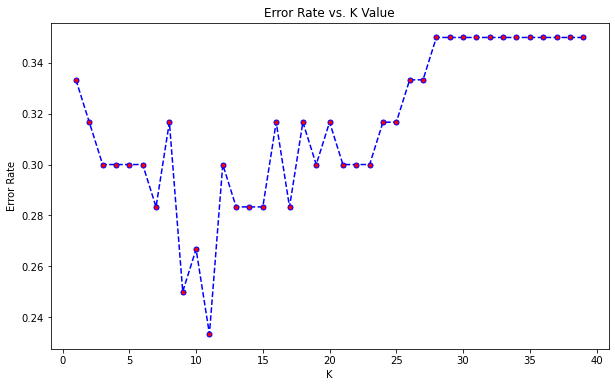

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),sse,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [40]:
model2= KNeighborsClassifier(n_neighbors=11)
model2.fit(X_train, y_train)
k_pred=model2.predict(X_test)

In [41]:
print(classification_report(y_test, k_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        39
           1       1.00      0.33      0.50        21

    accuracy                           0.77        60
   macro avg       0.87      0.67      0.67        60
weighted avg       0.83      0.77      0.73        60



# Decision Tree

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [43]:
model3=DecisionTreeClassifier()
model3.fit(X_train, y_train)
model3.score(X_train, y_train)

1.0

In [44]:
d_pred= model3.predict(X_test)

In [45]:
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.67      0.57      0.62        21

    accuracy                           0.75        60
   macro avg       0.73      0.71      0.72        60
weighted avg       0.74      0.75      0.75        60



# Random forest

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [47]:
model4=RandomForestClassifier(n_estimators=100, max_depth=10)

In [48]:
model4.fit(X_train, y_train)
model4.score(X_train, y_train)

1.0

In [49]:
f_pred=model4.predict(X_test)

In [50]:
print(classification_report(y_test, f_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        39
           1       0.81      0.62      0.70        21

    accuracy                           0.82        60
   macro avg       0.82      0.77      0.79        60
weighted avg       0.82      0.82      0.81        60



# Support vector machine

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [52]:
model5=SVC()
model5.fit(X_train, y_train)
model5.score(X_train, y_train)

0.8702928870292888

In [53]:
s_pred=model5.predict(X_test)

In [54]:
print(classification_report(y_test, s_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        39
           1       0.82      0.43      0.56        21

    accuracy                           0.77        60
   macro avg       0.79      0.69      0.70        60
weighted avg       0.78      0.77      0.74        60



# hyper parameter tunning

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid={"C":[1,10,100,100], "gamma":[0.1,0.01,0.001,0.0001]}

In [58]:
grid=GridSearchCV(SVC(), param_grid, verbose=2)

In [59]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [60]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [61]:
model5=SVC(C=100, gamma=0.001)
model5.fit(X_train, y_train)
s_pred=model5.predict(X_test)

In [62]:
print(classification_report(y_test, s_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        39
           1       1.00      0.38      0.55        21

    accuracy                           0.78        60
   macro avg       0.88      0.69      0.70        60
weighted avg       0.84      0.78      0.75        60



# Naive-bayes

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [64]:
model6=GaussianNB()
model6.fit(X_train, y_train)
model6.score(X_train, y_train)

0.799163179916318

In [65]:
g_pred=model6.predict(X_test)

In [66]:
print(classification_report(y_test, g_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.60      0.43      0.50        21

    accuracy                           0.70        60
   macro avg       0.67      0.64      0.64        60
weighted avg       0.69      0.70      0.69        60



# from my observation Random forest did better than all the algorithms because it has better recall score than the rest, all the remaining did okay but has bad recall score